<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rawpy  ##tells collab that this is a cmd - whatever cmd , just prefix  !
import numpy as np 
import cv2 
import rawpy 
import imageio
from sklearn.linear_model import LinearRegression 
import os 
import math
import matplotlib.pyplot as plt 
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

     |████████████████████████████████| 686kB 6.3MB/s 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/RAW/'  #change dir to your project folder



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#To upload 

1. Airveda CSV (real time)
2. Weather - past historic data 

In [0]:

temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1/')
jpg_names=[]
name_jpg=[]
dummy=[]
origin_time={}           #storing original timestamps 
#loading .jpg file names (ONLY Names) from RAW_Batch1
for name in temp: 
    path = '/content/gdrive/My Drive/RAW/RAW_Batch1/' + str(name)
    if(name.endswith('.jpg')):
      try: 
        name_jpg.append(path)
        dummy=name.split('_')
        k=str(dummy[1])+str(dummy[2])+str(dummy[3])+str(dummy[4])+str(dummy[5])
        jpg_names.append(k)
        origin_time[path]=k
      except: 
        print(name)



In [5]:
#Opening AirVeda csv 

temp={}
with open('/content/airveda.csv', mode ='r') as csv_file: 
      csv_reader=csv.reader(csv_file)
      for row in csv_reader: 
        temp[row[0]]=row[2]
stamp={}
for iter in temp: 
  try: 
    k=iter.split(':')
    stamp[(str(k[0])+ str(k[1]))]=temp[iter]
  except: 
    pass 
  
y={}
for stp in stamp: 
    x=stp.split('-')
    y[(str(x[0])+str(x[1])+str(x[2]))]=stamp[stp]

    
final_av={}
for ctr in y:
  z=ctr.split(' ')
  final_av[(str(z[0])+str(z[1]))]=y[ctr]
  

  
print(len(final_av))

2800


In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [167]:
#Matching airveda data with jpeg names to getting matching timestamps 

match={}
for name in jpg_names:
  for stmp in final_av: 
    if(stmp==name and stmp not in match):
      match[stmp]=final_av[stmp]
      

timestamps=[]

for key in match:
  timestamps.append(str(key))
  
print(timestamps)
print(len(timestamps))

hours=[]
for stamp in timestamps: 
    hours.append(stamp[8:-2])

pm=[]
for p in match:
  pm.append(match[p])

print(pm)
print(len(pm))


#timestamps, pm , weather , trans, contrast, entropy
#Plotting time against pm 

# f,ax = plt.subplots(1,1,figsize=(10,10))
# ax.scatter(hours,pm)


['201906141845', '201906141842', '201906141830', '201906141835', '201906141856', '201906121903', '201906141850', '201906121905', '201906121855', '201906121806', '201906111909', '201906121722', '201906121801', '201906111900', '201906121750', '201906111828', '201906121755', '201906121742', '201906121745', '201906121735', '201906150948', '201906150942', '201906150937', '201906150932', '201906150927', '201906150922', '201906150917', '201906150912', '201906150907', '201906150902', '201906150857', '201906150852', '201906150847', '201906150842', '201906150838', '201906150833', '201906150827', '201906150822', '201906150817', '201906150812', '201906150807', '201906150802', '201906150800', '201906150622', '201906150620', '201906150616', '201906150615', '201906150611', '201906150605', '201906150603', '201906141827', '201906141821', '201906141815', '201906141810', '201906141805', '201906141804', '201906141803', '201906141758', '201906141753', '201906141750', '201906141744', '201906141738', '201906

In [0]:
#Matching  timestamps to the images that should be read 
crspond={}
for key in match: 
  for val in origin_time: 
    if(origin_time[val]==key):
      value=[]
      value.append(match[key])
      value.append(key)
      crspond[val]=value
      break
      

print(len(crspond))

trans_jpg=[]
entropy_jpg=[]
contrast_jpg=[]
images_jpg=[]
k=0
for key in crspond:
  try:
    read = cv2.imread(key)
    read = cv2.resize(read, (32, 32))
    images_jpg.append(read)
    k+=1
    print(k)
  except: 
    print(name)
    
    


In [184]:
print(crspond)

{'/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_14_18_45_34_844.jpg': ['26', '201906141845'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_14_18_42_06_904.jpg': ['26', '201906141842'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_14_18_30_34_488.jpg': ['26', '201906141830'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_14_18_35_36_707.jpg': ['26', '201906141835'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_14_18_56_06_981.jpg': ['29', '201906141856'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_12_19_03_06_773.jpg': ['165', '201906121903'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_14_18_50_34_870.jpg': ['26', '201906141850'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_12_19_05_47_598.jpg': ['99', '201906121905'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_12_18_55_47_455.jpg': ['47', '201906121855'], '/content/gdrive/My Drive/RAW/RAW_Batch1/JPEG_2019_06_12_18_06_25_370.jpg': ['47', '201906121806']

KeyError: ignored

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
  return (-1 * ent[0])

In [0]:
trans_jpg=[]
for img in images_jpg:
  k=transmission(img, retMean= True)
  trans_jpg.append(k)
  print(k)
  
  
print(len(trans_jpg))



In [0]:
contrast_jpg=[]
for img in images_jpg: 
  k=contrast(img)
  print(k)
  contrast_jpg.append(k)

In [0]:
entropy_jpg=[]
for img in images_jpg: 
  k=entropy(img)
  print(k)
  entropy_jpg.append(k)

In [145]:
#!pip install urlopen
import json 
import requests 
import urlopen
from pandas.io.json import json_normalize

with open('/content/weather_historic.json') as file: 
  data=json.load(file)
  store=data["data"]
  table=json_normalize(store['weather'])
  
  
values=table.values  
date=[]

for i in range(0,9,1):
  dummy = values[i][3]
  dummy= dummy.split('-')
  dummy = str(dummy[0]) + str(dummy[1]) + str(dummy[2])
  date.append(dummy)


final=[]
for key in date:
  for j in range(0, 24, 1):
    temp = values[i][4][j]
    hr = int(temp['time'])
    if(hr<=900 and hr!=0):
      hr='0'+ str(hr)
    if(hr==0):
      hr='000'+ str(hr)
    final.append(hr)
    hr=[]
    
hour = final[:24]
# print(hour)
# print(len(hour))

date = list(map(int,date))
# print(date)
# print(len(date))
# print(hour)

time_weather=[]
for day in date:
  for h in hour:
    time_weather.append(str(day)+str(h))

    
print(len(time_weather))
  


temp=[]
ws=[]
wd=[]
prec=[]
hdty=[]
vis=[]
pressure=[]
cc=[]
dp=[]

for i in range(0,9,1):
  for j in range(0,24,1):
    temp.append(values[i][4][j]['tempC'])
    ws.append(values[i][4][j]['windspeedKmph'])
    wd.append(values[i][4][j]['winddirDegree'])
    prec.append(values[i][4][j]['precipMM'])
    hdty.append(values[i][4][j]['humidity'])
    vis.append(values[i][4][j]['visibility'])
    pressure.append(values[i][4][j]['pressure'])
    cc.append(values[i][4][j]['cloudcover'])
    dp.append(values[i][4][j]['DewPointC'])
   

w_features={}
for i in range(0,216):
  val=[]
  val.append(int(temp[i]))
  val.append(int(ws[i]))
  val.append(int(wd[i]))
  val.append(float(prec[i]))
  val.append(int(hdty[i]))
  val.append(int(vis[i]))
  val.append(int(pressure[i]))
  val.append(int(cc[i]))
  val.append(int(dp[i]))
  w_features[(int(time_weather[i]))]=val
  
print(w_features)



time_weather = list(map(int,time_weather))
time_weather = np.reshape(time_weather, (216,1))
temp = list(map(int,temp))
temp = np.reshape(temp, (216,1))
ws = list(map(int,ws))
ws = np.reshape(ws, (216,1))
wd = list(map(int,wd))
wd = np.reshape(wd, (216,1))
prec = list(map(float,prec))
prec = np.reshape(prec, (216,1))
hdty = list(map(int,hdty))
hdty = np.reshape(hdty, (216,1))
vis = list(map(int,vis))
vis = np.reshape(vis, (216,1))
pressure = list(map(int,pressure))
pressure = np.reshape(pressure, (216,1))

# print(vis)
# print(len(vis))
# print(pressure)
# print(len(pressure))
# print(cc)
# print(len(cc))
# print(dp)
# # print(len(dp))

# value = np.hstack((time_weather, temp, ws, wd, prec, hdty, vis, pressure ))


216
{201906110000: [44, 13, 286, 0.0, 8, 10, 992, 4, 2], 201906110100: [43, 11, 292, 0.0, 8, 10, 992, 9, 2], 201906110200: [42, 9, 298, 0.0, 9, 10, 992, 15, 2], 201906110300: [42, 8, 304, 0.0, 9, 10, 992, 20, 3], 201906110400: [41, 8, 300, 0.0, 10, 10, 993, 25, 3], 201906110500: [41, 8, 296, 0.0, 10, 10, 993, 30, 3], 201906110600: [40, 9, 292, 0.0, 10, 10, 994, 35, 3], 201906110700: [41, 9, 299, 0.0, 10, 10, 994, 31, 3], 201906110800: [42, 9, 306, 0.0, 9, 10, 995, 27, 3], 201906110900: [43, 9, 313, 0.0, 9, 10, 995, 23, 2], 201906111000: [44, 11, 314, 0.0, 8, 10, 995, 30, 2], 201906111100: [45, 12, 316, 0.0, 7, 10, 995, 36, 1], 201906111200: [47, 14, 318, 0.0, 6, 10, 994, 43, 1], 201906111300: [47, 14, 312, 0.0, 6, 10, 993, 40, 1], 201906111400: [47, 15, 306, 0.0, 6, 10, 993, 38, 1], 201906111500: [48, 15, 299, 0.0, 6, 10, 992, 36, 1], 201906111600: [47, 14, 295, 0.0, 6, 11, 992, 37, 1], 201906111700: [47, 14, 291, 0.0, 7, 12, 991, 38, 2], 201906111800: [47, 14, 286, 0.0, 7, 13, 991, 39

In [176]:
len(h_d_w)

30

In [189]:
super_final={}
for key in crspond:
  temp=str(crspond[key][1][:-2])
  for w in w_features:
    w=str(w)
    print(w)
    if(str(w[:-2])==str(temp)):
      super_final[key]=w_features[w]
      
print(len(super_final))
print(super_final)

201906110000
201906110100
201906110200
201906110300
201906110400
201906110500
201906110600
201906110700
201906110800
201906110900
201906111000
201906111100
201906111200
201906111300
201906111400
201906111500
201906111600
201906111700
201906111800
201906111900
201906112000
201906112100
201906112200
201906112300
201906120000
201906120100
201906120200
201906120300
201906120400
201906120500
201906120600
201906120700
201906120800
201906120900
201906121000
201906121100
201906121200
201906121300
201906121400
201906121500
201906121600
201906121700
201906121800
201906121900
201906122000
201906122100
201906122200
201906122300
201906130000
201906130100
201906130200
201906130300
201906130400
201906130500
201906130600
201906130700
201906130800
201906130900
201906131000
201906131100
201906131200
201906131300
201906131400
201906131500
201906131600
201906131700
201906131800
201906131900
201906132000
201906132100
201906132200
201906132300
201906140000
201906140100
201906140200
201906140300
201906140400

KeyError: ignored

In [172]:
#Matching JPEG, WEATHER time 

#w_features - timestamp - corresponding weather values 
super_final={}
# for time in h_d_w:
#   for key in w_features:
#     if(key==time):
#       print("MATCH:", time,key)
#       super_final[(h_d_w[time])]=w_features[key]
#     else:
#       print("NO:", time,key)

for time in h_d_w:
  for key in w_features:
    if(str(key)[0:9]==str(time)[0:9]):
      if((str(key)[9:-1]==str(time)[9:-1])):
        print("MATCH:", time,key)
        super_final[(h_d_w[time])]=w_features[key]
        break
      else:
        print("NO:", time,key)
      
print(len(super_final))
print(super_final)
    



NO: 201906141800 201906141000
NO: 201906141800 201906141100
NO: 201906141800 201906141200
NO: 201906141800 201906141300
NO: 201906141800 201906141400
NO: 201906141800 201906141500
NO: 201906141800 201906141600
NO: 201906141800 201906141700
MATCH: 201906141800 201906141800
NO: 201906121900 201906121000
NO: 201906121900 201906121100
NO: 201906121900 201906121200
NO: 201906121900 201906121300
NO: 201906121900 201906121400
NO: 201906121900 201906121500
NO: 201906121900 201906121600
NO: 201906121900 201906121700
NO: 201906121900 201906121800
MATCH: 201906121900 201906121900
NO: 201906121800 201906121000
NO: 201906121800 201906121100
NO: 201906121800 201906121200
NO: 201906121800 201906121300
NO: 201906121800 201906121400
NO: 201906121800 201906121500
NO: 201906121800 201906121600
NO: 201906121800 201906121700
MATCH: 201906121800 201906121800
NO: 201906111900 201906111000
NO: 201906111900 201906111100
NO: 201906111900 201906111200
NO: 201906111900 201906111300
NO: 201906111900 201906111400
N

In [0]:
#FEATURE FINETUNING 

#Converting timestamps to int 
hours=np.reshape(np.array(list(map(int,hours))), (322, 1))
transmission=np.reshape(np.array(list(map(float,trans_jpg))), (322, 1))
entropy=np.reshape(np.array(list(map(float,entropy_jpg))), (322, 1))
contrast=np.reshape(np.array(list(map(float,contrast_jpg))),(322,1))
windspeed=np.reshape(windspeed, (322,1))
temp=np.reshape(temp, (322,1))
humidity=np.reshape(humidity, (322,1))
pressure=np.reshape(pressure, (322,1))
visibility=np.reshape(visibility, (322,1))
prec=np.reshape(prec, (322,1))



ValueError: ignored

In [0]:
#REGRESSION 
regr = LinearRegression()
labels = pm

#All features 

x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.3, random_state= 24)

model = regr.fit(x_train, y_train)  #method of LinearRegression which fits the model : y_train is the target value or the value that it should ideally come to  

pred = regr.predict(x_test)
print(regr.score(x_train,y_train)) #printing R^2Score 


#kfold 
kf=KFold(n_splits=3)
kf.get_n_splits(x_train)
scores = cross_validation_score()

leaveOneOut 

# loo = LeaveOneOut()
# loo.get_n_splits(x_train)
# scores = cross_val_score(model, x_train, y_train, cv=7)
# print(scores)
# predictions = cross_val_predict(model, x_train, y_train, cv=6)

# #print(mean_squared_error(pred, y_test)**0.5)
# print(regr.score(x_train,y_train)) #printing R^2Score 




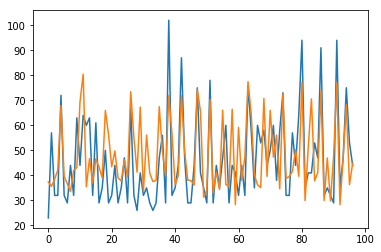

In [0]:
plt.plot(y_test)    #blue - ideal labels 
plt.plot(pred)      #orange - predicted labels    

In [0]:

#features = np.hstack((hours,transmission,entropy, contrast, windspeed, temp, humidity, pressure, visibility, prec)) - 18.59
#features = np.hstack((hours,entropy, contrast, windspeed, temp, humidity)) - 20.9
#features = np.hstack((hours,transmission,entropy, contrast)) - 18.45
#features = np.hstack((hours,entropy, contrast, windspeed, humidity)) - 20.8
#features = np.hstack((transmission,entropy, contrast))-19.97
#features = np.hstack((hours,transmission,entropy, contrast, windspeed, temp, humidity))-18.64


In [0]:
import csv 
cpcb={}
ctr=0
mod=0

#['11-06-2019 00:30', '11-06-2019 00:45', '118']

with open('/content/cpcb_historic.csv') as file:
  csv_reader = csv.reader(file,delimiter = ',')
  for row in csv_reader: 
    ctr+=1
    mod+=1
    if(ctr>=18 and mod%4==0):
      dummy=row[0]
      dummy=dummy.split('-')
      hours=dummy[2].split(' ')
      t=hours[1].split(':')
      dummy=(str(hours[0]) + str(dummy[1]) + str(dummy[0]) + ' ' + str(t[0]))
      cpcb[dummy] = row[2]

air_read={}
with open('/content/airveda.csv') as air:
  reader = csv.reader(air, delimiter =',') #getting all the unique timestamps 
  for row in reader: 
    try:
      k=str(row[0])
      dummy=k.split('-')
      dummy=str(dummy[0])+str(dummy[1])+str(dummy[2])
      dummy=dummy.split(':')
      dummy=str(dummy[0])
      air_read[dummy]=row[1]
    except:
      pass 
    

    

#The dictionary having hours plotted against the PM values for the airveda 
pm_air=[]
tm=[]
for key in air_read:
  if(key in cpcb):
    tm.append(key)
    
plot_cpcb=[]
plot_air=[]
for key in tm: 
  plot_cpcb.append(cpcb[key])
  plot_air.append(air_read[key])

plot_cpcb=np.array(plot_cpcb, dtype =np.int32)
plot_air=np.array(plot_air, dtype =np.int32)


plt.plot(plot_cpcb)
plt.plot(plot_air)
  
 


In [0]:
# # with open('/content/gdrive/My Drive/RAW/RAW_Batch1/airveda.csv') as file : 
# #   read = csv.reader(file, delimiter =',')
# #   for row in read:
# #     print(row)
    
    
    
# temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1/')
# print(temp)
# for file in temp:
#   if(file.endswith('.csv')):
#     print(file)